# Choosing a location for an oil well

Project for a mining company. We need to decide where to drill a new well.

I was provided with oil samples in three regions: in each of 10,000 fields, where they measured the quality of oil and the volume of its reserves. Build a machine learning model to help determine the region where mining will bring the most profit. Possible profits and risks will be analyzed using the *Bootstrap* technique.

Steps to choose a location:

- In the selected region, they are looking for deposits, for each, the values ​​of the signs are determined;
- Build a model and estimate the volume of reserves;
- Select the deposits with the highest value estimates. The number of fields depends on the company's budget and the cost of developing one well;
- The profit is equal to the total profit of the selected fields.

## Loading and preparing data

I import the libraries necessary for data processing.

In [39]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
from scipy import stats as st
from math import sqrt
import seaborn as sns
import itertools

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

colormap = plt.cm.GnBu_r

from sklearn.model_selection import train_test_split, KFold, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


#disable warnings
import warnings
warnings.filterwarnings('ignore')

#from IPython.display import display

I import the dataframes for researching.

In [40]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

I create a function for the initial evaluation of data - the size of datasets, the researching of datasets "at a glance", a heat map.

In [41]:
def take_a_look(df):
    print(df.shape)
    print()
    print(df.head())
    print()
    sns.heatmap(df.corr(), annot=True, square=True, center=0, fmt='.1g', cmap=colormap)

### First region

(100000, 5)

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647



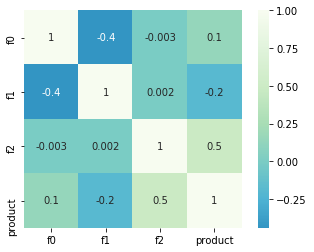

In [42]:
take_a_look(geo_data_0)

### Second region

(100000, 5)

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305



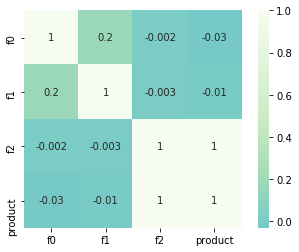

In [43]:
take_a_look(geo_data_1)

### Third region

(100000, 5)

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746



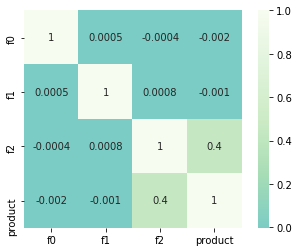

In [44]:
take_a_look(geo_data_2)

### Check for duplicates

In [45]:
print(geo_data_0.duplicated().value_counts())
print(geo_data_1.duplicated().value_counts())
print(geo_data_2.duplicated().value_counts())

False    100000
dtype: int64
False    100000
dtype: int64
False    100000
dtype: int64


###### Conclusion

The data is remarkably prepared, no duplicates were found, it can be seen that the feature f2 is highly correlated with the target feature product.

## Train and validate the model

I start training the model and selecting parameters. And split the features.

In [46]:
x_geo0 = geo_data_0.drop(['id','product'], axis=1)
y_geo0 = geo_data_0['product']
x_geo1 = geo_data_1.drop(['id','product'], axis=1)
y_geo1 = geo_data_1['product']
x_geo2 = geo_data_2.drop(['id','product'], axis=1)
y_geo2 = geo_data_2['product']

In [47]:
x_geo0_train, x_geo0_test, y_geo0_train, y_geo0_test = train_test_split(x_geo0, y_geo0, random_state=12345)
display((x_geo0_train.shape, x_geo0_test.shape, y_geo0_train.shape, y_geo0_test.shape))

x_geo1_train, x_geo1_test, y_geo1_train, y_geo1_test = train_test_split(x_geo1, y_geo1, random_state=12345)
display((x_geo1_train.shape, x_geo1_test.shape, y_geo1_train.shape, y_geo1_test.shape))

x_geo2_train, x_geo2_test, y_geo2_train, y_geo2_test = train_test_split(x_geo2, y_geo2, random_state=12345)
display((x_geo2_train.shape, x_geo2_test.shape, y_geo2_train.shape, y_geo2_test.shape))

((75000, 3), (25000, 3), (75000,), (25000,))

((75000, 3), (25000, 3), (75000,), (25000,))

((75000, 3), (25000, 3), (75000,), (25000,))

According to the project condition, linear regression will be applied.

In [48]:
model = LinearRegression()

Automatically iterate over parameters using GridSearchCV.

In [49]:
params = {'fit_intercept' : [True, False], 'normalize' : [True, False]}

model_gs_geo0 = GridSearchCV(model, params, cv=5, verbose=1)
model_gs_geo1 = GridSearchCV(model, params, cv=5, verbose=1)
model_gs_geo2 = GridSearchCV(model, params, cv=5, verbose=1)

model_gs_geo0.fit(x_geo0_train, y_geo0_train)
model_gs_geo1.fit(x_geo1_train, y_geo1_train)
model_gs_geo2.fit(x_geo2_train, y_geo2_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

I store the predicted values in separate lists.

In [50]:
prediction_geo0 = model_gs_geo0.predict(x_geo0_test)
prediction_geo1 = model_gs_geo1.predict(x_geo1_test)
prediction_geo2 = model_gs_geo2.predict(x_geo2_test)
prediction_geo0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

Calculation of the deviation of the predicted values and writing to a separate dataframe.

In [51]:
region_list = ['geo0', 'geo1', 'geo2']

for i in range(len(region_list)):
    globals()[region_list[i]+'_results'] = pd.DataFrame({
        'real':globals()['y_'+region_list[i]+'_test'].reset_index(drop=True), 
        'predicted':pd.Series(globals()['prediction_'+region_list[i]])})
    globals()[region_list[i]+'_results']['difference'] = (globals()[region_list[i]+'_results']['real'] -
        globals()[region_list[i]+'_results']['predicted'])
    print(region_list[i]+'_results')
    display(globals()[region_list[i]+'_results'].head())

geo0_results


,real,predicted,difference
0,10.038645,95.894952,-85.856307
1,114.551489,77.572583,36.978906
2,132.603635,77.892640,54.710996
3,169.072125,90.175134,78.896991
4,122.325180,70.510088,51.815092


geo1_results


,real,predicted,difference
0,80.859783,82.663314,-1.803531
1,53.906522,54.431786,-0.525264
2,30.132364,29.748760,0.383604
3,53.906522,53.552133,0.354389
4,0.000000,1.243856,-1.243856


geo2_results


,real,predicted,difference
0,61.212375,93.599633,-32.387258
1,41.850118,75.105159,-33.255040
2,57.776581,90.066809,-32.290228
3,100.053761,105.162375,-5.108614
4,109.897122,115.303310,-5.406189


Calculation of the root-mean-square error of the model for different regions.

In [52]:
for i in range(len(region_list)):
    globals()['mse_'+region_list[i]] = mean_squared_error(globals()[region_list[i]+'_results']['real'], 
                                                          globals()[region_list[i]+'_results']['predicted'])
    globals()['rmse_'+region_list[i]] = globals()['mse_'+region_list[i]]**0.5
    globals()['real_mean_'+region_list[i]] = globals()[region_list[i]+'_results']['real'].mean()
    globals()['pred_mean_'+region_list[i]] = globals()[region_list[i]+'_results']['predicted'].mean()
    globals()['real_product_'+region_list[i]] = globals()[region_list[i]+'_results']['real'].sum()
    globals()['pred_product_'+region_list[i]] = globals()[region_list[i]+'_results']['predicted'].sum()
    
    print(f'Region = {region_list[i]}')
    print()
    print('RMSE =', globals()['rmse_'+region_list[i]].round(2))
    print('Real mean =', globals()['real_mean_'+region_list[i]].round(2))
    print('Predicted mean =', globals()['pred_mean_'+region_list[i]].round(2))
    print('Real total product =', globals()['real_product_'+region_list[i]].round(0))
    print('Predicted total product =', globals()['pred_product_'+region_list[i]].round(0))

    print()

Region = geo0

RMSE = 37.58
Real mean = 92.08
Predicted mean = 92.59
Real total product = 2301965.0
Predicted total product = 2314814.0

Region = geo1

RMSE = 0.89
Real mean = 68.72
Predicted mean = 68.73
Real total product = 1718078.0
Predicted total product = 1718214.0

Region = geo2

RMSE = 40.03
Real mean = 94.88
Predicted mean = 94.97
Real total product = 2372106.0
Predicted total product = 2374126.0



Creation of a dataframe with significant indicators by region.

In [53]:
all_regions_results = pd.DataFrame({
    'Region' : ['geo0', 'geo1', 'geo2'], 'RMSE' : [rmse_geo0, rmse_geo1, rmse_geo2],
    'Real mean' : [real_mean_geo0, real_mean_geo1, real_mean_geo2],
    'Predicted mean' : [pred_mean_geo0, pred_mean_geo1, pred_mean_geo2],
    'Real total product' : [real_product_geo0, real_product_geo1, real_product_geo2],
    'Predicted total product' : [pred_product_geo0, pred_product_geo1, pred_product_geo2]
}).round(2)

all_regions_results

,Region,RMSE,Real mean,Predicted mean,Real total product,Predicted total product
0,geo0,37.58,92.08,92.59,2301964.92,2314814.19
1,geo1,0.89,68.72,68.73,1718078.40,1718213.67
2,geo2,40.03,94.88,94.97,2372105.82,2374126.15


###### Conclusion

The data is divided into training and validation sets, the model is trained, predictions are written in a separate dataframe. The average predicted stock of raw materials for each region was calculated. The model shows the lowest RMSE value in the second geo1 region (probably due to the large correlation coefficient of the feature f2 in the second dataset). The largest predicted values of the stock of raw materials are in the first and third regions, but their RMSE is also high and is almost half of the average predicted values.

## Preparation for profit calculation

I turn to the calculation of profit. I start by writing the threshold values from the project conditions into variables.

In [54]:
product_breakeven_ttl = 10000000/450
product_breakeven_each = product_breakeven_ttl/200
profit_per_product_mln = 0.45
budget_mln = 10000

geo0_mean = geo_data_0['product'].mean()
geo1_mean = geo_data_1['product'].mean()
geo2_mean = geo_data_2['product'].mean()

print(f'Общий объём сырья для безубыточной разработки = {product_breakeven_ttl:.2f} тысяч баррелей',
      f'Объём сырья для безубыточной разработки одного месторождения = {product_breakeven_each:.2f} тысяч баррелей',
      f'Средний объём сырья месторождения в регионе geo0 = {geo0_mean:.2f} тысяч баррелей',
      f'Средний объём сырья месторождения в регионе geo1 = {geo1_mean:.2f} тысяч баррелей',
      f'Средний объём сырья месторождения в регионе geo2 = {geo2_mean:.2f} тысяч баррелей',
     sep='\n')

Общий объём сырья для безубыточной разработки = 22222.22 тысяч баррелей
Объём сырья для безубыточной разработки одного месторождения = 111.11 тысяч баррелей
Средний объём сырья месторождения в регионе geo0 = 92.50 тысяч баррелей
Средний объём сырья месторождения в регионе geo1 = 68.83 тысяч баррелей
Средний объём сырья месторождения в регионе geo2 = 95.00 тысяч баррелей


Calculation of profit from each well by region: we multiply the reserves of raw materials by profit per barrel.

In [55]:
geo0_results['real_profit_mln'] = geo0_results['real']*profit_per_product_mln
geo0_results['pred_profit_mln'] = geo0_results['predicted']*profit_per_product_mln
geo1_results['real_profit_mln'] = geo1_results['real']*profit_per_product_mln
geo1_results['pred_profit_mln'] = geo1_results['predicted']*profit_per_product_mln
geo2_results['real_profit_mln'] = geo2_results['real']*profit_per_product_mln
geo2_results['pred_profit_mln'] = geo2_results['predicted']*profit_per_product_mln

display(geo0_results.head())
display(geo1_results.head())
display(geo2_results.head())

,real,predicted,difference,real_profit_mln,pred_profit_mln
0,10.038645,95.894952,-85.856307,4.517390,43.152728
1,114.551489,77.572583,36.978906,51.548170,34.907662
2,132.603635,77.892640,54.710996,59.671636,35.051688
3,169.072125,90.175134,78.896991,76.082456,40.578810
4,122.325180,70.510088,51.815092,55.046331,31.729540


,real,predicted,difference,real_profit_mln,pred_profit_mln
0,80.859783,82.663314,-1.803531,36.386902,37.198491
1,53.906522,54.431786,-0.525264,24.257935,24.494304
2,30.132364,29.748760,0.383604,13.559564,13.386942
3,53.906522,53.552133,0.354389,24.257935,24.098460
4,0.000000,1.243856,-1.243856,0.000000,0.559735


,real,predicted,difference,real_profit_mln,pred_profit_mln
0,61.212375,93.599633,-32.387258,27.545569,42.119835
1,41.850118,75.105159,-33.255040,18.832553,33.797321
2,57.776581,90.066809,-32.290228,25.999462,40.530064
3,100.053761,105.162375,-5.108614,45.024192,47.323069
4,109.897122,115.303310,-5.406189,49.453705,51.886490


I sort the predicted results and select the 200 most successful of them. I form a common dataset with the results.

In [56]:
geo0_top200 = geo0_results.sort_values('predicted', ascending=False)[:200]
geo1_top200 = geo1_results.sort_values('predicted', ascending=False)[:200]
geo2_top200 = geo2_results.sort_values('predicted', ascending=False)[:200]

profit0 = pd.DataFrame(geo0_top200.drop(['difference'], axis=1).sum()).transpose().rename(index={0: 'geo0'})
profit1 = pd.DataFrame(geo1_top200.drop(['difference'], axis=1).sum()).transpose().rename(index={0: 'geo1'})
profit2 = pd.DataFrame(geo2_top200.drop(['difference'], axis=1).sum()).transpose().rename(index={0: 'geo2'})
profit_all_regions = pd.concat([profit0, profit1, profit2])
profit_all_regions['real_profit_mln'] = profit_all_regions['real_profit_mln'] - budget_mln
profit_all_regions['pred_profit_mln'] = profit_all_regions['pred_profit_mln'] - budget_mln
profit_all_regions.round(2)

,real,predicted,real_profit_mln,pred_profit_mln
geo0,29601.84,31102.33,3320.83,3996.05
geo1,27589.08,27746.03,2415.09,2485.71
geo2,28245.22,29603.90,2710.35,3321.75


## Profit and Risk Calculation

Starting to calculate profit and risk using bootstrap.

To begin with, I create a function to calculate the profits from the two hundred most profitable wells, minus the budget.

In [57]:
def profit(df, quantity):
    return df.sort_values('pred_profit_mln', ascending=False)[:quantity]['real_profit_mln'].sum() - budget_mln

In [58]:
profit(geo1_top200, 200)

2415.0866966815083

Getting started with bootstrap.

In [59]:
state = np.random.RandomState(12345)
values0 = []
for i in range(1000):
    subsample = geo0_results.sample(n=500, random_state=state, replace=True)
    values0.append(profit(subsample, 200))

In [60]:
state = np.random.RandomState(12345)
values1 = []
for i in range(1000):
    subsample = geo1_results.sample(n=500, random_state=state, replace=True)
    values1.append(profit(subsample, 200))

In [61]:
state = np.random.RandomState(12345)
values2 = []
for i in range(1000):
    subsample = geo2_results.sample(n=500, random_state=state, replace=True)
    values2.append(profit(subsample, 200))

In [62]:
values0, values1, values2 = pd.Series(values0), pd.Series(values1), pd.Series(values2)

Гистограмма распределения прибыли с 1000 выборок с региона geo0


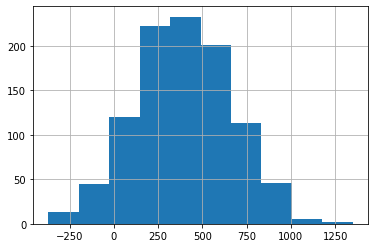

In [63]:
print('Гистограмма распределения прибыли с 1000 выборок с региона geo0')
values0.hist();

Гистограмма распределения прибыли с 1000 выборок с региона geo1


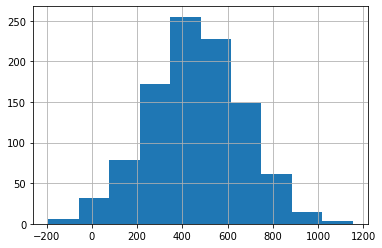

In [64]:
print('Гистограмма распределения прибыли с 1000 выборок с региона geo1')
values1.hist();

Гистограмма распределения прибыли с 1000 выборок с региона geo2


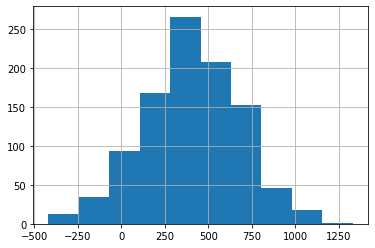

In [65]:
print('Гистограмма распределения прибыли с 1000 выборок с региона geo2')
values2.hist();

In [66]:
for i in range(0,3):
    globals()['mean_profit'+str(i)] = globals()['values'+str(i)].mean()
    globals()['confidence_interval_low'+str(i)] = globals()['values'+str(i)].quantile(0.025)
    globals()['confidence_interval_hight'+str(i)] = globals()['values'+str(i)].quantile(0.975) 
    globals()['risk'+str(i)] = globals()['values'+str(i)][globals()['values'+str(i)] < 0].count() / \
        globals()['values'+str(i)].count()
    
    print(f'Регион geo{i}')
    print()
    print('Средняя прибыль =', globals()['mean_profit'+str(i)].round(2))
    print('95% доверительный интервал = от', globals()['confidence_interval_low'+str(i)].round(2),
         'до', globals()['confidence_interval_hight'+str(i)].round(2))
    print('Риск убытков =', globals()['risk'+str(i)]*100, '%')
    print()

Регион geo0

Средняя прибыль = 396.16
95% доверительный интервал = от -111.22 до 909.77
Риск убытков = 6.9 %

Регион geo1

Средняя прибыль = 456.05
95% доверительный интервал = от 33.82 до 852.29
Риск убытков = 1.5 %

Регион geo2

Средняя прибыль = 404.4
95% доверительный интервал = от -163.35 до 950.36
Риск убытков = 7.6 %



In [68]:
bootstrap_results = pd.DataFrame({
    'Region' : ['geo0', 'geo1', 'geo2'], 'Mean profit' : [mean_profit0, mean_profit1, mean_profit2],
    'Conf interval start' : [confidence_interval0[0], confidence_interval1[0], confidence_interval2[0]],
    'Conf interval end' : [confidence_interval0[1], confidence_interval1[1], confidence_interval2[1]],
    'Risk%' : [risk0*100, risk1*100, risk2*100]
})
bootstrap_results.round(2)

,Region,Mean profit,Conf interval start,Conf interval end,Risk%
0,geo0,396.16,379.62,412.71,6.9
1,geo1,456.05,439.50,472.59,1.5
2,geo2,404.40,387.86,420.95,7.6


In [69]:
all_regions_results

,Region,RMSE,Real mean,Predicted mean,Real total product,Predicted total product
0,geo0,37.58,92.08,92.59,2301964.92,2314814.19
1,geo1,0.89,68.72,68.73,1718078.40,1718213.67
2,geo2,40.03,94.88,94.97,2372105.82,2374126.15


In [70]:
profit_all_regions.round(2)

,real,predicted,real_profit_mln,pred_profit_mln
geo0,29601.84,31102.33,3320.83,3996.05
geo1,27589.08,27746.03,2415.09,2485.71
geo2,28245.22,29603.90,2710.35,3321.75


In [71]:
bootstrap_results.round(2)

,Region,Mean profit,Conf interval start,Conf interval end,Risk%
0,geo0,396.16,379.62,412.71,6.9
1,geo1,456.05,439.50,472.59,1.5
2,geo2,404.40,387.86,420.95,7.6


## Conclusion

The second region geo1 is best suited for development. The risk of loss is 1.5%, and the profit in the 95% confidence interval is the largest in this region.